# Milestone Project 1: Food Vision Big

## Check GPU

## Check GPU

* Google Colab offers free GPUs (thank you google), however, not all of them are compatible with mixed precision training.

Google colab offers:
* K80 (not compatible)
* P100 (not compatible)
* Tesla T4 (compatible)

Knowing this, in order to use mixed precision training we need access to a Tesla T4 (from within Google Colab) or if we're using our own hadware, our GPU needs a score of 7.0+ 

In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-2d27ffb8-28f8-a3ac-ad88-54afa9d16279)


## Get helper functions 

In past modules, we've created a bunch of helper functions to do small tasks required for our notebookes.

Rather than rewrite all of these we can import a script and load them in from there.

The script we've got available can be found on GitHub: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
# Download helper function script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-10-06 23:39:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-06 23:39:52 (79.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow datasets to download data

If you want to get an overview of TensorFlow Datasets (TFDS), read the guide https://www.tensorflow.org/datasets/overview

In [4]:
# get Tensorflow Datasets
import tensorflow_datasets as tfds 

In [5]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print('food101' in datasets_list) # Target dataset in list of TFDS dataset

True


In [6]:
# Load in the data (take 5 - 6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name= 'food101',
                                             split = ['train', 'validation'],
                                             shuffle_files = True,
                                             as_supervised = True, # data gets returned in tuple format data-label
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompletePJONU2/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompletePJONU2/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from TFDS

To become one with our data, we want to find:
* Class names.
* The shape of our input data (image tensors).
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded).
* Do the labels match up with class names?

In [7]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [8]:
# Get the class names
class_names = ds_info.features['label'].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [9]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)Ç

In [10]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [11]:
# Output info about our training sample
for image, label in train_one_sample:
    print(f'''
    Image shape: {image.shape},
    Image datatype: {image.dtype},
    Target class from Food101 (tensor form): {label},
    Class name (str form): {class_names[label.numpy()]}
    ''')


    Image shape: (384, 512, 3),
    Image datatype: <dtype: 'uint8'>,
    Target class from Food101 (tensor form): 97,
    Class name (str form): takoyaki
    


In [12]:
# What does our image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 54,  30,  26],
        [ 57,  33,  29],
        [ 72,  49,  43],
        ...,
        [192, 184, 163],
        [190, 179, 159],
        [181, 169, 147]],

       [[ 51,  28,  22],
        [ 60,  37,  31],
        [ 81,  58,  52],
        ...,
        [191, 183, 162],
        [189, 176, 157],
        [176, 164, 142]],

       [[ 78,  58,  49],
        [ 96,  76,  67],
        [122, 102,  93],
        ...,
        [191, 183, 162],
        [188, 175, 156],
        [172, 157, 136]],

       ...,

       [[162, 140, 117],
        [164, 142, 119],
        [169, 147, 126],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[168, 146, 123],
        [170, 148, 125],
        [176, 154, 131],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[173, 151, 128],
        [176, 154, 131],
        [182, 160, 137],
        ...,
        [  4,   4,   

In [13]:
# what are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

#Plot and image from TensorFlow Dataset

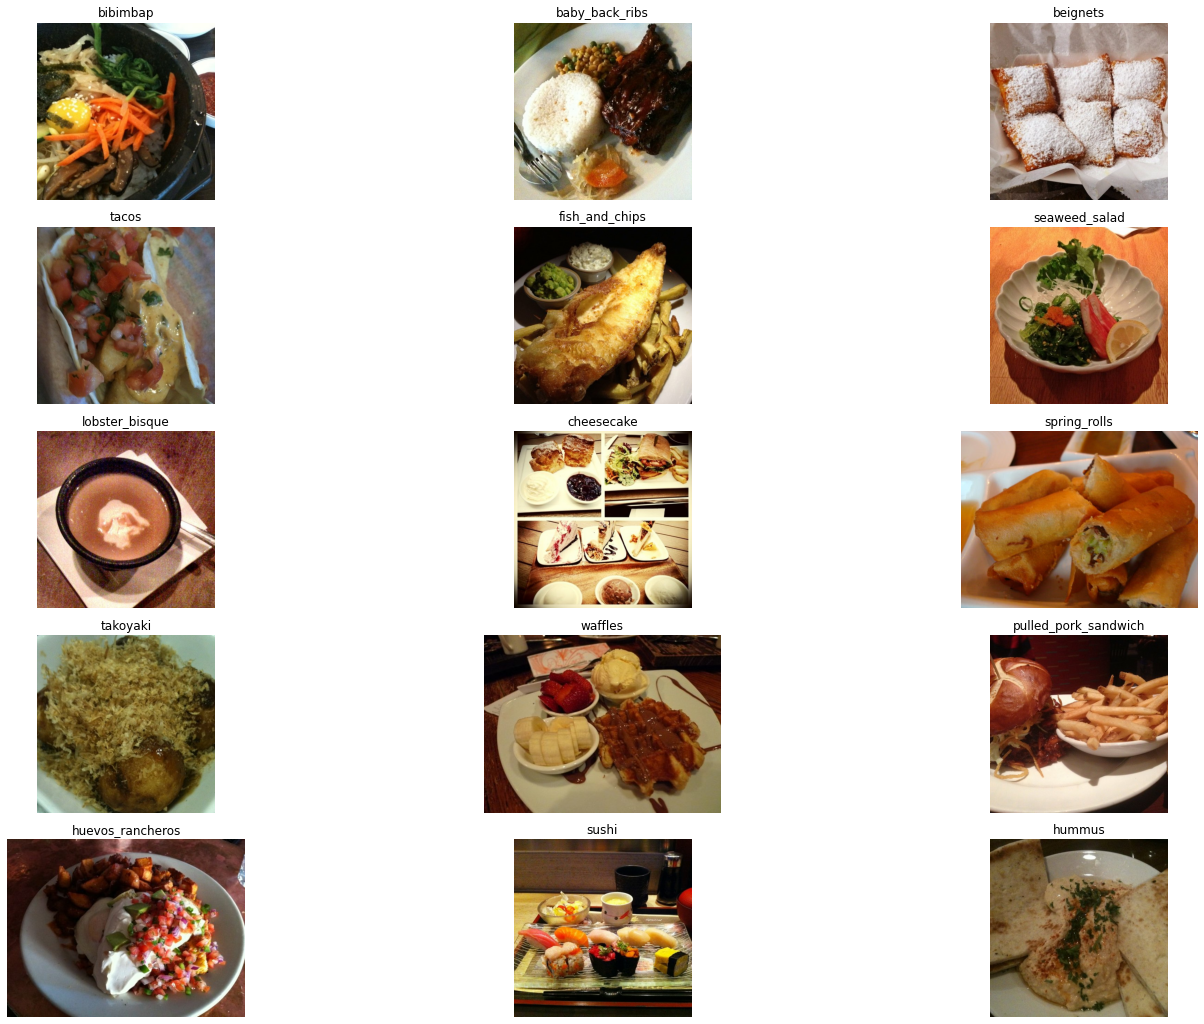

In [14]:
# Plot images of tensors
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for num, (image, label) in enumerate(train_data.take(15)):
    plt.subplot(7, 3, num+1)
    plt.imshow(image)
    plt.title(class_names[label.numpy()])
    plt.axis(False)
plt.tight_layout();

## Create preprocessing functions for our data

Neural network perform best when data is in a certain way (e.g. batched, normalized, etc.)

However, not all data (including data from Tensorflow Datasets) comes like this.

So in order to get it ready for nerual network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know model like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`).
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size.
* Scaled (values between 0 & 1) also called normalized tensors generally perform better.

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we're going to be using an EfficientNetBX pretrianed mdoel from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in).

This means our functions need to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensor from `uint8` to `float32`

In [15]:
# Make a function for preprocessing images
def preprocess_image(image, label, img_shape=224):
    '''
    Converts image datatype from `uint8` -> `float32` and reshapes 
    image to [img_shape, img_shape, colour_channels]
    '''
    image = tf.image.resize(image, size = [img_shape, img_shape]) # reshape target image
    # img = img/255. # scale images values (not required by EffNetBX model from tf.keras.applications)
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [16]:
# Preprocess a single sample image and check the output
preprocessed_image = preprocess_image(image, label)[0]
print(f'Image before preprocessing: \n {image[:2]}..., \n Shape{image.shape}, \n Datatype{image.dtype} \n')
print(f'Image after preprocessing: \n {preprocessed_image[:2]}..., \n Shape{preprocessed_image.shape}, \n Datatype{preprocessed_image.dtype}')

Image before preprocessing: 
 [[[40 34 10]
  [35 29  5]
  [29 23  0]
  ...
  [ 9 15  5]
  [14 20 10]
  [11 17  7]]

 [[35 29  5]
  [33 27  3]
  [29 23  0]
  ...
  [11 17  7]
  [17 23 13]
  [14 20 10]]]..., 
 Shape(512, 512, 3), 
 Datatype<dtype: 'uint8'> 

Image after preprocessing: 
 [[[34.811226  28.811224   4.811224 ]
  [31.520409  25.520409   1.591837 ]
  [36.07143   30.071428   8.071427 ]
  ...
  [15.714177  21.714176  11.714177 ]
  [14.331575  20.331575  10.331575 ]
  [14.8570385 20.857038  10.8570385]]

 [[33.10204   27.102041   3.7653067]
  [31.198978  25.198978   1.1989789]
  [35.92857   29.92857    7.9285707]
  ...
  [ 8.357054  11.357054   4.3570538]
  [ 8.2142315 11.2142315  4.2142315]
  [ 9.785643  12.785643   5.7856426]]]..., 
 Shape(224, 224, 3), 
 Datatype<dtype: 'float32'>


## Batch & Prepare datasets

We're now going to make our data input pipeline run really fast.

For more resources on this, I'd highly recommend going through the following guide. https://www.tensorflow.org/guide/data_performance 

In [17]:
# Map preprocessing function training (and parallelize)
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function test data
test_data = test_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
train_data, test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

> 'Hey, Tensorflow, map this preprocessing function (``preprocess_image`) across our trianing dataset, then shuffle a number of elements and then batch them together and finally make sure you prepare new batches (prefetch) whilst the model is looking through (finding patterns) the current batch.

## Create modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:
* TensorBoard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save our model's progress after feature extraction

In [19]:
# Create tensorboard callback (import from helper_functions.py)
from helper_functions import create_tensorboard_callback

# Create a ModelCheckpoint callback to save a model's progress during training
checkpoint_path = 'model_checkpoints/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = 'val_acc',
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0) # don't print 

## Setup mixed precision training

First and foremost, for a deeper understanding of a mixed precision training, check out the Tensorflow guide for mixed precision.

Mixed preciison utilizes a combination of float32 and float16 data dtypes to speed up model performance.

In [20]:
# Turn on mixed precision trianing
from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16') # set global data policy to mixed precision

## Build feature extraction model

In [21]:
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape= input_shape, name = 'input_layer')
# Note: EfficientNetBX model have rescaling built-in but if your model doesn't you can have a layer like below
# x = preprocessing.Rescaling(1/255.)(x)
x = base_model(inputs)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)
# x = layers.Dense(len(class_names))(x)
# outputs = layers.Activation('softmax', dtype= tf.float32, name='softmax_float32')
outputs = layers.Dense(len(class_names),
                       activation="softmax",
                       name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

16719872/16705208 [==============================] - 0s 0us/step


In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avg_pooling (GlobalAv (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 101)               129381    
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


## Checking layer dtype policies (are we using mixed precision?)

In [23]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "float32">
global_avg_pooling True float32 <Policy "float32">
output_layer True float32 <Policy "float32">


Going through the above we see:
* `layer.name` : the human redable name of a particular layer
* `layer.trainable`: is the layer trainbale or not? (if `False`, the weights are frozen)
* `layer.dtype` : the data type a layer stores its variables in 
* `layer.dtype_policy`: the data type policy a layer computes on its variables with 

In [24]:
# Check the dtype_policy attributes of layers in the base model
for layer in model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "float32">
normalization False float32 <Policy "float32">
stem_conv_pad False float32 <Policy "float32">
stem_conv False float32 <Policy "float32">
stem_bn False float32 <Policy "float32">
stem_activation False float32 <Policy "float32">
block1a_dwconv False float32 <Policy "float32">
block1a_bn False float32 <Policy "float32">
block1a_activation False float32 <Policy "float32">
block1a_se_squeeze False float32 <Policy "float32">
block1a_se_reshape False float32 <Policy "float32">
block1a_se_reduce False float32 <Policy "float32">
block1a_se_expand False float32 <Policy "float32">
block1a_se_excite False float32 <Policy "float32">
block1a_project_conv False float32 <Policy "float32">
block1a_project_bn False float32 <Policy "float32">
block2a_expand_conv False float32 <Policy "float32">
block2a_expand_bn False float32 <Policy "float32">
block2a_expand_activation False float32 <Policy "float32">


##  Fit the feature extraction model

If our goal is to fine-tune a pretrained model, the general order of doing things is:
1. Build a feature extraction model (train a couple output layers with base layers frozen)
2. Fine-tune some of the frozen layers

In [25]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs = 5,
                                                     validation_data = test_data,
                                                     validation_steps = int(0.15 * len(test_data)),
                                                     callbacks = [create_tensorboard_callback(dir_name = 'training_logs',
                                                                                              experiment_name ='efficient_101_classes_all_data_feat'),
                                                                  model_checkpoint])

Saving TensorBoard log files to: training_logs/efficient_101_classes_all_data_feat/20211006-234935


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
2368/2368 [==============================] - 355s 134ms/step - loss: 1.8817 - accuracy: 0.5416 - val_loss: 1.2284 - val_accuracy: 0.6748


Epoch 2/5
2368/2368 [==============================] - 315s 132ms/step - loss: 1.3699 - accuracy: 0.6468 - val_loss: 1.1297 - val_accuracy: 0.6986


Epoch 3/5
2368/2368 [==============================] - 309s 130ms/step - loss: 1.2291 - accuracy: 0.6800 - val_loss: 1.0848 - val_accuracy: 0.7082


Epoch 4/5
2368/2368 [==============================] - 317s 133ms/step - loss: 1.1368 - accuracy: 0.7011 - val_loss: 1.0734 - val_accuracy: 0.7076


Epoch 5/5
2368/2368 [==============================] - 309s 130ms/step - loss: 1.0728 - accuracy: 0.7162 - val_loss: 1.0517 - val_accuracy: 0.7124


In [26]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 96s 122ms/step - loss: 1.0598 - accuracy: 0.7114


[1.0597507953643799, 0.7114059329032898]

## Saving the model

In [27]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/101_feature_extraction')

INFO:tensorflow:Assets written to: saved_model/101_feature_extraction/assets


INFO:tensorflow:Assets written to: saved_model/101_feature_extraction/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [28]:
new_model = tf.keras.models.load_model('saved_model/101_feature_extraction')

In [29]:
loaded_model = new_model.evaluate(test_data)
loaded_model

790/790 [==============================] - 99s 123ms/step - loss: 1.0597 - accuracy: 0.7114


[1.059749960899353, 0.7114059329032898]

## Fine-tunning

In [30]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

In [31]:
# Recompile model with lower learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [32]:
# Setting up Early Stopping Callback
checkpoint_path = 'model_checkpoints/cp.ckpt'
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = 'val_loss',
                                                      save_best_only = True,
                                                      save_weights_only = False,
                                                      verbose = 0) 

In [ ]:
fine_tune_epochs = 100

history_101_food_classes_fine_tune = model.fit(train_data,
                                               epochs = fine_tune_epochs,
                                               initial_epoch = history_101_food_classes_feature_extract.epoch[-1],
                                               validation_data = test_data,
                                               validation_steps = int(0.15 * len(test_data)),
                                               callbacks = [create_tensorboard_callback(dir_name = 'training_logs',
                                                                                        experiment_name ='efficient_101_classes_all_data_tunning'),
                                                            model_checkpoint,
                                                            early_stop_callback])

Saving TensorBoard log files to: training_logs/efficient_101_classes_all_data_tunning/20211007-002220
Epoch 5/100


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


2368/2368 [==============================] - 1330s 555ms/step - loss: 1.1723 - accuracy: 0.6911 - val_loss: 0.7425 - val_accuracy: 0.7926
INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/100
2368/2368 [==============================] - 1315s 554ms/step - loss: 0.7119 - accuracy: 0.8062 - val_loss: 0.6803 - val_accuracy: 0.8125
INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/100
2368/2368 [==============================] - 1320s 556ms/step - loss: 0.5054 - accuracy: 0.8630 - val_loss: 0.6608 - val_accuracy: 0.8154
INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets


INFO:tensorflow:Assets written to: model_checkpoints/cp.ckpt/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 8/100
2368/2368 [==============================] - 1322s 557ms/step - loss: 0.3590 - accuracy: 0.9024 - val_loss: 0.6619 - val_accuracy: 0.8149
Epoch 9/100
2368/2368 [==============================] - 1310s 552ms/step - loss: 0.2552 - accuracy: 0.9324 - val_loss: 0.6760 - val_accuracy: 0.8218
Epoch 10/100
2368/2368 [==============================] - 1312s 553ms/step - loss: 0.1867 - accuracy: 0.9523 - val_loss: 0.6959 - val_accuracy: 0.8186
Epoch 11/100
2368/2368 [==============================] - 1325s 559ms/step - loss: 0.1413 - accuracy: 0.9645 - val_loss: 0.7132 - val_accuracy: 0.8220
Epoch 12/100
2368/2368 [==============================] - 1318s 556ms/step - loss: 0.1168 - accuracy: 0.9697 - val_loss: 0.7266 - val_accuracy: 0.8194
Epoch 13/100
2368/2368 [==============================] - 1306s 551ms/step - loss: 0.0985 - accuracy: 0.9748 - val_loss: 0.7405 - val_accuracy: 0.8175
Epoch 14/100
2368/2368 [==============================] - 1316s 555ms/step - loss: 0.0849 - accu

In [ ]:
model.save('saved_model/101_finetuned_model')

## View training results on TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./training_logs \
  --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
  --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
  --one_shot

## Results analysis

In [ ]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_101_fine_tune = model.evaluate(test_data)
results_all_classes_101_fine_tune

In [ ]:
compare_historys(original_history=history_101_food_classes_feature_extract,
                 new_history=history_101_food_classes_fine_tune,
                 initial_epochs=5)

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1)

# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax())

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)